In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/datasets/알약 데이터

/content/drive/.shortcut-targets-by-id/1lmF6jA_naU2cHk7Qbl9pJ33NnIFZB8Qf/알약 데이터


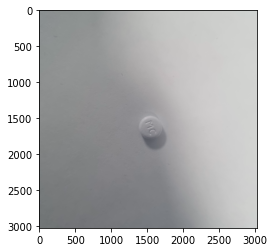

In [ ]:
image = cv2.imread('./뮤코라민정/20221115_151707.jpg')

plt.imshow(image);plt.show()

In [ ]:
image.shape

(3024, 3024, 3)

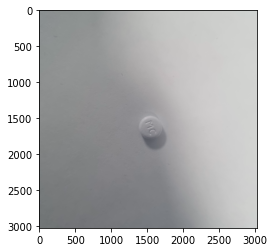

In [ ]:
# 컬러 이미지 로드
image_bgr = cv2.imread('./뮤코라민정/20221115_151707.jpg', cv2.IMREAD_COLOR)

# RGB 타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image_bgr); plt.show()

### 이미지 크기 변경

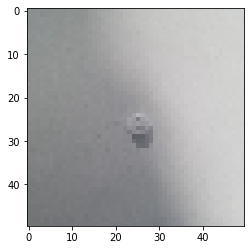

In [ ]:
image_50x50 = cv2.resize(image, (50,50))

# 출력
plt.imshow(image_50x50, cmap = 'gray')

### 이미지 크롭

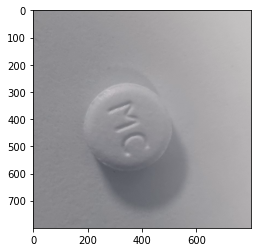

In [ ]:
image_crop = image[1200:2000, 1200:2000]

plt.imshow(image_crop, cmap = 'gray')
plt.show()



### 이미지 선명하게 표현

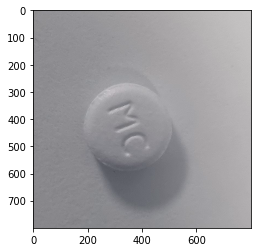

In [ ]:
# 커널 생성 (대상이 있는 픽셀을 강조)
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# 커널 적용
image_sharp = cv2.filter2D(image_crop, -1, kernel)

plt.imshow(image_sharp)
plt.show()

### 이미지 대비 높이기

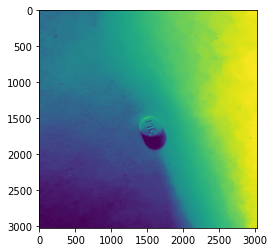

In [ ]:
# 이미지 IMREAD_GRAYSCALE로 출력해야 함
image = cv2.imread('./뮤코라민정/20221115_151707.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 대비 향상
image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced)
plt.show()

### 이미지 이진화

In [ ]:
# adaptive thresholding 적용
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

image_binarized = cv2.adaptiveThreshold(image,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)


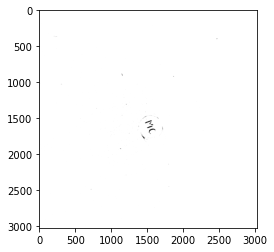

In [ ]:
plt.imshow(image_binarized, cmap = 'gray')
plt.show()

### 배경 제거

In [ ]:
image_bgr = cv2.imread('./뮤코라민정/20221115_151707.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
# 사각형 좌표: 시작점의 x,y, ?, 너비
rectangle = (1200, 1400, 500, 700)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabcut에 사용할 임시 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# grabcut 실행
cv2.grabCut(image_rgb, 
            mask,
            rectangle,
            bgdModel,  # 배경을 위한 임시 배열
            fgdModel,  # 전경을 위한 임시 배열
            5,         # 반복횟수
            cv2.GC_INIT_WITH_RECT)  # 사각형을 위한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.62372893e-01, 2.08968604e-01, 1.30986528e-01, 2.47768867e-01,
         1.49903108e-01, 2.05230941e+02, 2.06284856e+02, 2.06299245e+02,
         1.44309669e+02, 1.43884045e+02, 1.41998847e+02, 1.62405491e+02,
         1.61049483e+02, 1.61596712e+02, 1.29425447e+02, 1.26656622e+02,
         1.25266539e+02, 1.89126173e+02, 1.89551503e+02, 1.90516699e+02,
         1.13777904e+01, 1.26012480e+01, 1.02255080e+01, 1.26012480e+01,
         1.47574360e+01, 1.14374846e+01, 1.02255080e+01, 1.14374846e+01,
         9.88889770e+00, 1.61149644e+01, 1.71301187e+01, 1.50901576e+01,
         1.71301187e+01, 1.91303097e+01, 1.55047884e+01, 1.50901576e+01,
         1.55047884e+01, 1.56037120e+01, 6.90534043e+01, 7.59132312e+01,
         7.94353436e+01, 7.59132312e+01, 8.5

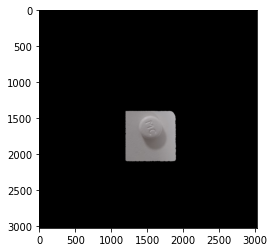

In [ ]:
# 배경인 곳은 0, 아닌 곳은 1로 설정한 마스크 생성
mask_2 = np.where((mask == 2) | (mask == 0), 0,1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:,:, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.show()